In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Import and Merge Data

In [2]:
users = pd.read_csv('takehome_users.csv', encoding='ISO-8859-1')
print(users.shape)
print(users.columns)
users

(12000, 10)
Index(['object_id', 'creation_time', 'name', 'email', 'creation_source',
       'last_session_creation_time', 'opted_in_to_mailing_list',
       'enabled_for_marketing_drip', 'org_id', 'invited_by_user_id'],
      dtype='object')


,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0
...,...,...,...,...,...,...,...,...,...,...
11995,11996,2013-09-06 06:14:15,Meier Sophia,SophiaMeier@gustr.com,ORG_INVITE,1.378448e+09,0,0,89,8263.0
11996,11997,2013-01-10 18:28:37,Fisher Amelie,AmelieFisher@gmail.com,SIGNUP_GOOGLE_AUTH,1.358275e+09,0,0,200,NaN
11997,11998,2014-04-27 12:45:16,Haynes Jake,JakeHaynes@cuvox.de,GUEST_INVITE,1.398603e+09,1,1,83,8074.0
11998,11999,2012-05-31 11:55:59,Faber Annett,mhaerzxp@iuxiw.com,PERSONAL_PROJECTS,1.338638e+09,0,0,6,NaN


In [3]:
engagement = pd.read_csv('takehome_user_engagement.csv')
print(engagement.shape)
engagement

(207917, 3)


,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1
...,...,...,...
207912,2013-09-06 06:14:15,11996,1
207913,2013-01-15 18:28:37,11997,1
207914,2014-04-27 12:45:16,11998,1
207915,2012-06-02 11:55:59,11999,1


In [4]:
users = users.rename(columns={'object_id': 'user_id'})
users.head()

,user_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [5]:
users['creation_time']= pd.to_datetime(users['creation_time'])

In [6]:
users.dtypes

user_id                                int64
creation_time                 datetime64[ns]
name                                  object
email                                 object
creation_source                       object
last_session_creation_time           float64
opted_in_to_mailing_list               int64
enabled_for_marketing_drip             int64
org_id                                 int64
invited_by_user_id                   float64
dtype: object

## Basic EDA

In [7]:
users.describe()

,user_id,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
count,12000.00000,8.823000e+03,12000.000000,12000.000000,12000.000000,6417.000000
mean,6000.50000,1.379279e+09,0.249500,0.149333,141.884583,5962.957145
std,3464.24595,1.953116e+07,0.432742,0.356432,124.056723,3383.761968
min,1.00000,1.338452e+09,0.000000,0.000000,0.000000,3.000000
25%,3000.75000,1.363195e+09,0.000000,0.000000,29.000000,3058.000000
50%,6000.50000,1.382888e+09,0.000000,0.000000,108.000000,5954.000000
75%,9000.25000,1.398443e+09,0.000000,0.000000,238.250000,8817.000000
max,12000.00000,1.402067e+09,1.000000,1.000000,416.000000,11999.000000


In [8]:
engagement.dtypes

time_stamp    object
user_id        int64
visited        int64
dtype: object

In [9]:
engagement['time_stamp'] = pd.to_datetime(engagement['time_stamp'])
engagement = engagement.set_index('time_stamp')
engagement

,user_id,visited
time_stamp,,
2014-04-22 03:53:30,1,1
2013-11-15 03:45:04,2,1
2013-11-29 03:45:04,2,1
2013-12-09 03:45:04,2,1
2013-12-25 03:45:04,2,1
...,...,...
2013-09-06 06:14:15,11996,1
2013-01-15 18:28:37,11997,1
2014-04-27 12:45:16,11998,1


In [10]:
print(min(engagement.index))
print(max(engagement.index))

2012-05-31 08:20:06
2014-06-06 14:58:50


In [11]:
engagement.describe()

,user_id,visited
count,207917.000000,207917.0
mean,5913.314197,1.0
std,3394.941674,0.0
min,1.000000,1.0
25%,3087.000000,1.0
50%,5682.000000,1.0
75%,8944.000000,1.0
max,12000.000000,1.0


## Calculate total number of visits per user

In [12]:
visits = engagement.groupby('user_id').sum()
visits.head()

,visited
user_id,
1,1
2,14
3,1
4,1
5,1


In [13]:
users = users.merge(visits, how='left', on='user_id')
users.head()

,user_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,visited
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,1.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,14.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,1.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,1.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,1.0


In [14]:
users['visited'] = users['visited'].fillna(0)
users.head()

,user_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,visited
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0,1.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0,14.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0,1.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0,1.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0,1.0


## Calculate total usage duration from creation to last session

In [15]:
users['last_session_creation_time'] = pd.to_datetime(users['last_session_creation_time'], unit='s')
users['use_duration'] = users['last_session_creation_time'] - users['creation_time']
users['use_duration'] = users['use_duration'].dt.days
users.head()

,user_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,visited,use_duration
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,10803.0,1.0,0.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316.0,14.0,136.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,2013-03-19 23:14:52,0,0,94,1525.0,1.0,0.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,2013-05-22 08:09:28,0,0,1,5151.0,1.0,1.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,2013-01-22 10:14:20,0,0,193,5240.0,1.0,5.0


## Determine if user is considered adopted

In [16]:
from datetime import timedelta

def feature_adopted(u_id):    
#takes a users from dataframe and returns adopted - More than 3 logins in any 7-day period
    per = 7                                               # Period is 7 days
    df = engagement.loc[engagement['user_id'] == u_id]    # Select this user
    df = df.resample('D').mean().dropna()                 # Resample 
    adopted = 0
    for i in range(len(df)-2):                       #loop over active days till the second to last day
        if df.index[i + 2] - df.index[i] <= timedelta(days=per): # if gap between 3 logins less than period
            adopted = 1
            break
        else: adopted = 0
    return adopted

In [17]:
users['adopted'] = users['user_id'].apply(feature_adopted)
print(users.shape)
users.head()

(12000, 13)


,user_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,visited,use_duration,adopted
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,2014-04-22 03:53:30,1,0,11,10803.0,1.0,0.0,0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,2014-03-31 03:45:04,0,0,1,316.0,14.0,136.0,1
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,2013-03-19 23:14:52,0,0,94,1525.0,1.0,0.0,0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,2013-05-22 08:09:28,0,0,1,5151.0,1.0,1.0,0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,2013-01-22 10:14:20,0,0,193,5240.0,1.0,5.0,0


In [18]:
print(sum(users['adopted']))
print((sum(users['adopted'])/len(users['adopted']))*100)

1656
13.8


## Model Prep

In [32]:
df = users.drop(['name','email', 'creation_time', 'last_session_creation_time'], axis = 1)
df['invited_by_user_id'] = df['invited_by_user_id'].fillna(0) 
df['use_duration'] = df['use_duration'].fillna(0)
df.isnull().sum()

user_id                       0
creation_source               0
opted_in_to_mailing_list      0
enabled_for_marketing_drip    0
org_id                        0
invited_by_user_id            0
visited                       0
use_duration                  0
adopted                       0
dtype: int64

In [33]:
df = pd.get_dummies(df, columns = ['creation_source'])
df.head()

,user_id,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,visited,use_duration,adopted,creation_source_GUEST_INVITE,creation_source_ORG_INVITE,creation_source_PERSONAL_PROJECTS,creation_source_SIGNUP,creation_source_SIGNUP_GOOGLE_AUTH
0,1,1,0,11,10803.0,1.0,0.0,0,1,0,0,0,0
1,2,0,0,1,316.0,14.0,136.0,1,0,1,0,0,0
2,3,0,0,94,1525.0,1.0,0.0,0,0,1,0,0,0
3,4,0,0,1,5151.0,1.0,1.0,0,1,0,0,0,0
4,5,0,0,193,5240.0,1.0,5.0,0,1,0,0,0,0


## Create Model and evaluation Metrics

In [34]:
from sklearn.model_selection import train_test_split
X = df.drop('adopted',axis=1)
y = df['adopted']

X_train, y_train, X_test, y_test = train_test_split(X, y, test_size=0.25, random_state=74)

In [35]:
from sklearn.ensemble import RandomForestClassifier

#train and test classifier
rf = RandomForestClassifier()
rf.fit(X_train, X_test)
rf.score(y_train, y_test)

0.9903333333333333

In [36]:
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score

#print out classification report and confusion matrix
y_pred = rf.predict(y_train)

print(classification_report(y_test, y_pred))

cm= confusion_matrix(y_test,y_pred)
print('confusion matrix:')
print(cm)

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2591
           1       0.97      0.95      0.96       409

    accuracy                           0.99      3000
   macro avg       0.98      0.97      0.98      3000
weighted avg       0.99      0.99      0.99      3000

confusion matrix:
[[2581   10]
 [  19  390]]


In [38]:
features = pd.DataFrame()
features['coef'] = rf.feature_importances_
features = features.set_index(X.columns)
features.coef.nlargest(15)

visited                               0.502798
use_duration                          0.429121
org_id                                0.021180
user_id                               0.021024
invited_by_user_id                    0.012822
opted_in_to_mailing_list              0.002524
creation_source_PERSONAL_PROJECTS     0.002285
creation_source_ORG_INVITE            0.001842
enabled_for_marketing_drip            0.001706
creation_source_GUEST_INVITE          0.001694
creation_source_SIGNUP                0.001592
creation_source_SIGNUP_GOOGLE_AUTH    0.001413
Name: coef, dtype: float64

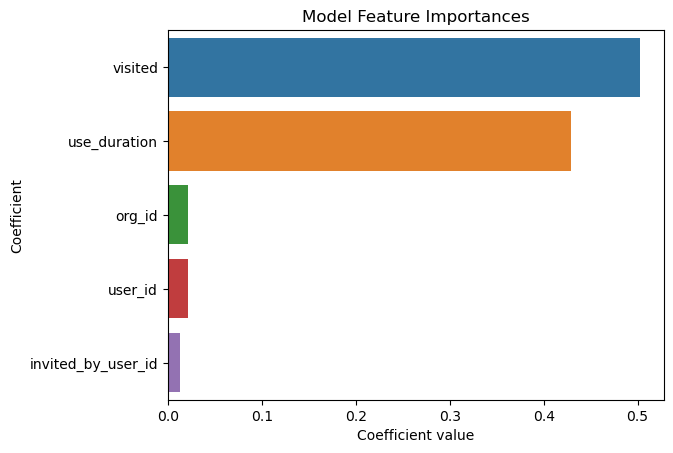

In [66]:
top5 = features.coef.nlargest(5)
sns.barplot(y=top5.index,x=top5.values)
plt.title('Model Feature Importances')
plt.ylabel('Coefficient')
plt.xlabel('Coefficient value')
plt.show()